<a href="https://colab.research.google.com/github/aayushabhatia/Data-Science-and-Business-Intelligence/blob/main/7feb_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PCA (Principal Component Analysis)

Algorithm Steps

1. Get our data
2. Give our data a structure
3. Standardize our data
4. Get Covariance of Z
5. Calculate Eigen Vectors and Eigen Values
6. Sort the Eigen Vectors
7. Calculate the new features
8. Drop unimportant features from the new set

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 1. Get our data

from google.colab import files
uploaded= files.upload()

# load data from a CSV file
iris_df= pd.read_csv("iris.csv")
display(iris_df)

Saving iris.csv to iris (2).csv


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [16]:
iris_df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [17]:
# 2. Give our data a structure

iris_df.shape

(150, 6)

In [18]:
X_variables=iris_df.iloc[:,0:4]
X_variables

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm
0,1,5.1,3.5,1.4
1,2,4.9,3.0,1.4
2,3,4.7,3.2,1.3
3,4,4.6,3.1,1.5
4,5,5.0,3.6,1.4
...,...,...,...,...
145,146,6.7,3.0,5.2
146,147,6.3,2.5,5.0
147,148,6.5,3.0,5.2
148,149,6.2,3.4,5.4


In [19]:
#Y_variables=iris_df.iloc[:,4]
#Y_variables

In [20]:
# 3. Standardize our data
# standardization centers data around 0(mean) with unit variance

sc = StandardScaler()
transformed_df= sc.fit_transform(X_variables)

transformed_df  # standardized dataset

array([[-1.72054204, -0.90068117,  1.03205722, -1.3412724 ],
       [-1.69744751, -1.14301691, -0.1249576 , -1.3412724 ],
       [-1.67435299, -1.38535265,  0.33784833, -1.39813811],
       [-1.65125846, -1.50652052,  0.10644536, -1.2844067 ],
       [-1.62816394, -1.02184904,  1.26346019, -1.3412724 ],
       [-1.60506942, -0.53717756,  1.95766909, -1.17067529],
       [-1.58197489, -1.50652052,  0.80065426, -1.3412724 ],
       [-1.55888037, -1.02184904,  0.80065426, -1.2844067 ],
       [-1.53578584, -1.74885626, -0.35636057, -1.3412724 ],
       [-1.51269132, -1.14301691,  0.10644536, -1.2844067 ],
       [-1.4895968 , -0.53717756,  1.49486315, -1.2844067 ],
       [-1.46650227, -1.26418478,  0.80065426, -1.227541  ],
       [-1.44340775, -1.26418478, -0.1249576 , -1.3412724 ],
       [-1.42031323, -1.87002413, -0.1249576 , -1.51186952],
       [-1.3972187 , -0.05250608,  2.18907205, -1.45500381],
       [-1.37412418, -0.17367395,  3.11468391, -1.2844067 ],
       [-1.35102965, -0.

In [21]:
# 4. Get Covariance
# covariance matrix measures how two variables change together

covariance_matrix = np.cov(transformed_df.T)
covariance_matrix

array([[ 1.00671141,  0.72148618, -0.40039813,  0.8886718 ],
       [ 0.72148618,  1.00671141, -0.11010327,  0.87760486],
       [-0.40039813, -0.11010327,  1.00671141, -0.42333835],
       [ 0.8886718 ,  0.87760486, -0.42333835,  1.00671141]])

In [22]:
# 5. Calculate Eigen Vectors and Eigen Values
# eigen values tells about amount of variance in each principal component

eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

In [24]:
# 6. Sort the Eigen Vectors
eigen_pairs = [(np.abs(eigen_values[i]), eigen_vectors[:,i]) for i in range(len(eigen_values))]
print('Eigenvalues arranged in descending order:')
for i in eigen_pairs:
    print(i[0])

Eigenvalues arranged in descending order:
2.8312290749738263
0.04725054797568567
0.2272951817317969
0.9210708329025816


In [26]:
pca = PCA()

In [27]:
pca = pca.fit(transformed_df)

In [30]:
explained_variance = pca.explained_variance_ratio_

In [31]:
explained_variance

array([0.70308855, 0.22873259, 0.05644497, 0.01173389])

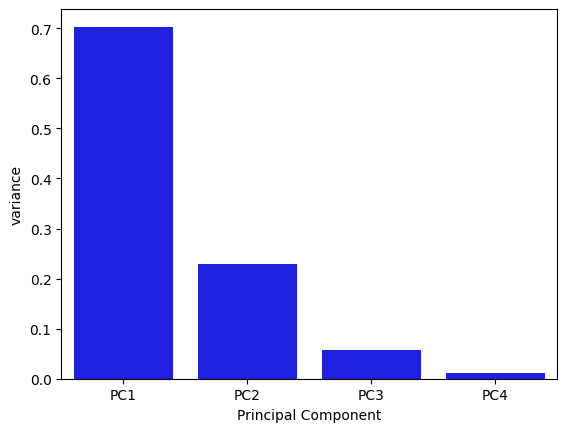

In [32]:
# 7. Calculate the new features
dataframe=pd.DataFrame({'variance': pca.explained_variance_ratio_, 'Principal Component': ['PC1', 'PC2', 'PC3', 'PC4']})
sns.barplot(x='Principal Component', y='variance', data=dataframe, color='b')
plt.show()

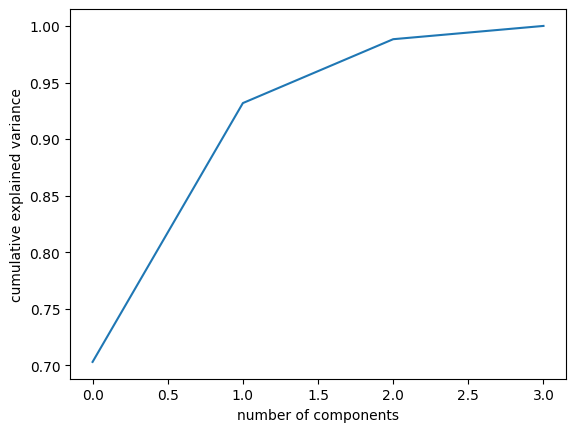

In [33]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [ ]:
pca_2 = PCA(n_components = 2)
pca_2 = pca_2.fit(transformed_df)